In [7]:
# uncomment install packages
#! pip install FlowCal
#! pip install pandas
#! pip install numpy
#! pip install scipy
#! pip install seaborn
#! pip install matplotlib
#! pip install rpy2
# need to install flan package in R

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import FlowCal as FC
import seaborn as sns
import os

# variants from a common file
import function_fcs as fc
from importlib import reload
reload(fc)

from matplotlib import colormaps
from scipy.stats import ttest_ind, t, skew

random_seed = 12  # Choose any integer value
np.random.seed(random_seed)

file_dir=os.getcwd()+'/'
mut_output='mutant_events/'

In [62]:
folder_='EvolvR/'
pcn_=[3,5,9,17,25]
'''
files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_

files_evolvR=files_
'''
#============================
p_value= fc.alpha_
print(p_value)

dataset_boxplot=[]
dataset_mut=[]
dataset_events=[]

for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_evolvR[PCN_]['fcs']

    data_=[]   # total events count
    mutant_=[] # mutant events count
    arr_=[]    # ratio

    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        mutant_.append(len(mut_))
        data_.append(len(data))
        
    dataset_boxplot.append(arr_)
    dataset_mut.append(mutant_)
    dataset_events.append(data_)

# save mutant and events count in 'mutant_events/' directory, can be run only at the beginning
# the exact number may vary depending on python libraries

#fc.write_mutant_file(dataset_mut, mut_output+folder_[:-1]+'_mut.txt')
#fc.write_events_file(dataset_events, mut_output+folder_[:-1]+'_events.txt')


0.02


mutant_events/EvolvR_mut.txt mutant_events/EvolvR_events.txt


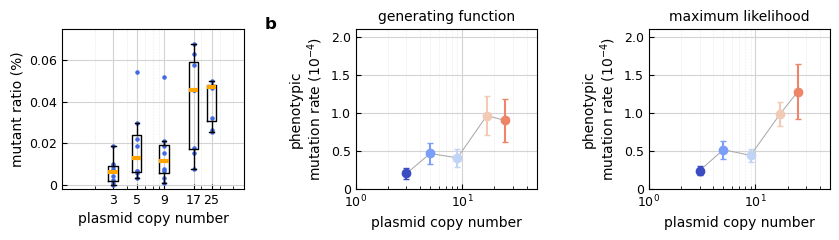

In [65]:
folder_='EvolvR/'
mut_file=mut_output+folder_[:-1]+'_mut.txt'
event_file=mut_output+folder_[:-1]+'_events.txt'
colors_=colormaps['coolwarm']
print(mut_file,event_file)
#=============================
labellist=pcn_

fig=plt.figure(figsize=(8.5,2.5))
#---------------------
ax1_= plt.subplot(131)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,50])
plt.ylim([-0.002,0.075])
#plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])

#---------------------
ax_= plt.subplot(132)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'GF')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,50])
plt.title('generating function', fontsize=10)
plt.annotate('b',xy=(-0.5, 1), xycoords='axes fraction',fontsize=12, fontweight='bold')

#----------------------
ax_= plt.subplot(133)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'ML')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,50])
plt.title('maximum likelihood', fontsize=10)

#=======================
plt.tight_layout()

In [67]:
reload(fc)  #IFFL_gain

folder_='IFFL_gain/'
pcn_=[3,5,17,39,79]

'''
files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_

files_gain=files_
'''
#============================
p_value= fc.alpha_
print(p_value)

dataset_boxplot=[]
dataset_mut=[]
dataset_events=[]

for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_gain[PCN_]['fcs']

    data_=[]   # total events count
    mutant_=[] # mutant events count
    arr_=[]    # ratio

    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        mutant_.append(len(mut_))
        data_.append(len(data))
        
    dataset_boxplot.append(arr_)
    dataset_mut.append(mutant_)
    dataset_events.append(data_)

# save mutant and events count in 'mutant_events/' directory, can be run only at the beginning
# the exact number may vary depending on python libraries

#fc.write_mutant_file(dataset_mut, mut_output+folder_[:-1]+'_mut.txt')
#fc.write_events_file(dataset_events, mut_output+folder_[:-1]+'_events.txt')


0.02


mutant_events/IFFL_gain_mut.txt mutant_events/IFFL_gain_events.txt


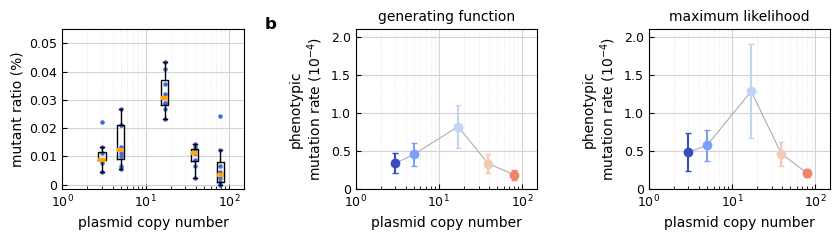

In [68]:
folder_='IFFL_gain/'
mut_file=mut_output+folder_[:-1]+'_mut.txt'
event_file=mut_output+folder_[:-1]+'_events.txt'
colors_=colormaps['coolwarm']
print(mut_file,event_file)

#====================================
labellist=pcn_

fig=plt.figure(figsize=(8.5,2.5))
#---------------------
ax1_= plt.subplot(131)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,150])
plt.ylim(-0.0015,0.055)
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])

#---------------------
ax_= plt.subplot(132)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'GF')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,150])
plt.title('generating function', fontsize=10)
plt.annotate('b',xy=(-0.5, 1), xycoords='axes fraction',fontsize=12, fontweight='bold')

#----------------------
ax_= plt.subplot(133)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'ML')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,150])
plt.title('maximum likelihood', fontsize=10)

#=======================
plt.tight_layout()

In [94]:
reload(fc) # IFFL_loss

folder_='IFFL_loss/'
pcn_=[3,5,9,17,39]

'''
files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_

files_loss=files_
'''
#============================
p_value= fc.alpha_
print(p_value)

dataset_boxplot=[]
dataset_mut=[]
dataset_events=[]

for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_loss[PCN_]['fcs']

    data_=[]   # total events count
    mutant_=[] # mutant events count
    arr_=[]    # ratio

    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        mutant_.append(len(mut_))
        data_.append(len(data))
        
    dataset_boxplot.append(arr_)
    dataset_mut.append(mutant_)
    dataset_events.append(data_)

# save mutant and events count in 'mutant_events/' directory, can be run only at the beginning
# the exact number may vary depending on python libraries

#fc.write_mutant_file(dataset_mut, mut_output+folder_[:-1]+'_mut.txt')
#fc.write_events_file(dataset_events, mut_output+folder_[:-1]+'_events.txt')


0.02


mutant_events/IFFL_loss_mut.txt mutant_events/IFFL_loss_events.txt


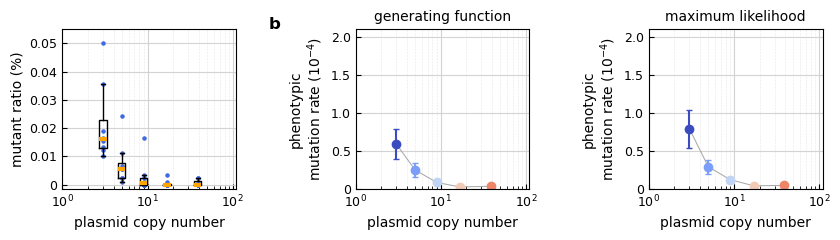

In [95]:
folder_='IFFL_loss/'
mut_file=mut_output+folder_[:-1]+'_mut.txt'
event_file=mut_output+folder_[:-1]+'_events.txt'
colors_=colormaps['coolwarm']
print(mut_file,event_file)
#====================================
labellist=pcn_

fig=plt.figure(figsize=(8.5,2.5))
#---------------------
ax1_= plt.subplot(131)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
plt.ylim(-0.0015,0.055)
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])

#---------------------
ax_= plt.subplot(132)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'GF')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,110])
plt.title('generating function', fontsize=10)
plt.annotate('b',xy=(-0.5, 1), xycoords='axes fraction',fontsize=12, fontweight='bold')

#----------------------
ax_= plt.subplot(133)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'ML')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,110])
plt.title('maximum likelihood', fontsize=10)

#=======================
plt.tight_layout()

In [96]:
folder_='regulator_lacI/'
pcn_=[3,5,9,17,39]

'''
files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_


files_regulatorlacI=files_
'''
#============================
p_value= fc.alpha_
print(p_value)

dataset_boxplot=[]
dataset_mut=[]
dataset_events=[]

for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_regulatorlacI[PCN_]['fcs']

    data_=[]   # total events count
    mutant_=[] # mutant events count
    arr_=[]    # ratio

    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        mutant_.append(len(mut_))
        data_.append(len(data))
        
    dataset_boxplot.append(arr_)
    dataset_mut.append(mutant_)
    dataset_events.append(data_)

# save mutant and events count in 'mutant_events/' directory, can be run only at the beginning
# the exact number may vary depending on python libraries

#fc.write_mutant_file(dataset_mut, mut_output+folder_[:-1]+'_mut.txt')
#fc.write_events_file(dataset_events, mut_output+folder_[:-1]+'_events.txt')


0.02


mutant_events/regulator_lacI_mut.txt mutant_events/regulator_lacI_events.txt


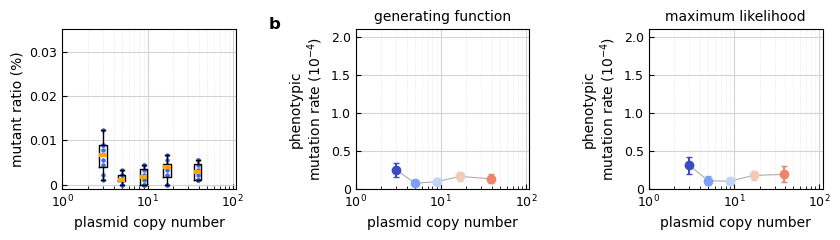

In [97]:
folder_='regulator_lacI/'
mut_file=mut_output+folder_[:-1]+'_mut.txt'
event_file=mut_output+folder_[:-1]+'_events.txt'
colors_=colormaps['coolwarm']
print(mut_file,event_file)

#===========================
labellist=pcn_

fig=plt.figure(figsize=(8.5,2.5))
#--------------------------
ax1_= plt.subplot(131)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
plt.ylim(-0.001,0.035);
plt.yticks([0,0.01, 0.02,0.03],['0','0.01','0.02','0.03'])
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])

#----------------
ax_= plt.subplot(132)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'GF')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,110])
plt.title('generating function', fontsize=10)
plt.annotate('b',xy=(-0.5, 1), xycoords='axes fraction',fontsize=12, fontweight='bold')

#----------------------
ax_= plt.subplot(133)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'ML')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,110])
plt.title('maximum likelihood', fontsize=10)

#=======================
plt.tight_layout()

In [98]:
folder_='regulator_lacO/'
pcn_=[3,5,9,17,39]

'''
files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_

files_regulatorlacO=files_
'''
#============================
p_value= fc.alpha_
print(p_value)

dataset_boxplot=[]
dataset_mut=[]
dataset_events=[]

for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_regulatorlacO[PCN_]['fcs']

    data_=[]   # total events count
    mutant_=[] # mutant events count
    arr_=[]    # ratio

    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        mutant_.append(len(mut_))
        data_.append(len(data))
        
    dataset_boxplot.append(arr_)
    dataset_mut.append(mutant_)
    dataset_events.append(data_)

# save mutant and events count in 'mutant_events/' directory, can be run only at the beginning
# the exact number may vary depending on python libraries

#fc.write_mutant_file(dataset_mut, mut_output+folder_[:-1]+'_mut.txt')
#fc.write_events_file(dataset_events, mut_output+folder_[:-1]+'_events.txt')


0.02


mutant_events/regulator_lacO_mut.txt mutant_events/regulator_lacO_events.txt


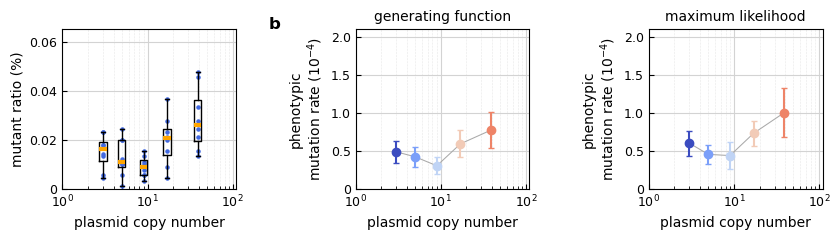

In [99]:
folder_='regulator_lacO/'
mut_file=mut_output+folder_[:-1]+'_mut.txt'
event_file=mut_output+folder_[:-1]+'_events.txt'
colors_=colormaps['coolwarm']
print(mut_file,event_file)

#====================================
labellist=pcn_

fig=plt.figure(figsize=(8.5,2.5))
#---------------------
ax1_= plt.subplot(131)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
#plt.ylim(0, None)
plt.ylim(0, 0.065)
plt.yticks([0,0.02,0.04,0.06],['0','0.02','0.04','0.06'])
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])

#----------------
ax_= plt.subplot(132)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'GF')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,110])
plt.title('generating function', fontsize=10)
plt.annotate('b',xy=(-0.5, 1), xycoords='axes fraction',fontsize=12, fontweight='bold')

#----------------------
ax_= plt.subplot(133)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'ML')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,110])
plt.title('maximum likelihood', fontsize=10)

#=======================
plt.tight_layout()

In [100]:
folder_='feedback_lacI/'
pcn_=[3,5,9,17,39]

'''
files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_


files_feedbacklacI=files_
'''
#============================
p_value= fc.alpha_
print(p_value)

dataset_boxplot=[]
dataset_mut=[]
dataset_events=[]

for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_feedbacklacI[PCN_]['fcs']

    data_=[]   # total events count
    mutant_=[] # mutant events count
    arr_=[]    # ratio

    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        mutant_.append(len(mut_))
        data_.append(len(data))
        
    dataset_boxplot.append(arr_)
    dataset_mut.append(mutant_)
    dataset_events.append(data_)

# save mutant and events count in 'mutant_events/' directory, can be run only at the beginning
# the exact number may vary depending on python libraries

#fc.write_mutant_file(dataset_mut, mut_output+folder_[:-1]+'_mut.txt')
#fc.write_events_file(dataset_events, mut_output+folder_[:-1]+'_events.txt')


0.02


mutant_events/feedback_lacI_mut.txt mutant_events/feedback_lacI_events.txt


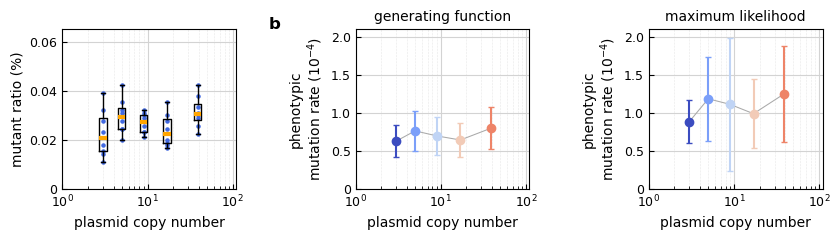

In [101]:
folder_='feedback_lacI/'
mut_file=mut_output+folder_[:-1]+'_mut.txt'
event_file=mut_output+folder_[:-1]+'_events.txt'
colors_=colormaps['coolwarm']
print(mut_file,event_file)
#====================================
labellist=pcn_

fig=plt.figure(figsize=(8.5,2.5))
#---------------------
ax1_= plt.subplot(131)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
plt.ylim(0, 0.065)
plt.yticks([0,0.02,0.04,0.06],['0','0.02','0.04','0.06'])
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])

#----------------
ax_= plt.subplot(132)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'GF')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,110])
plt.title('generating function', fontsize=10)
plt.annotate('b',xy=(-0.5, 1), xycoords='axes fraction',fontsize=12, fontweight='bold')

#----------------------
ax_= plt.subplot(133)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'ML')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,110])
plt.title('maximum likelihood', fontsize=10)

#=======================
plt.tight_layout()

In [78]:
folder_='feedback_lacO/'
pcn_=[3,5,9,17,39]
'''
files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_


files_feedbacklacO=files_
'''
#=========================
p_value= fc.alpha_
print(p_value)

dataset_boxplot=[]
dataset_mut=[]
dataset_events=[]

for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_feedbacklacO[PCN_]['fcs']

    data_=[]   # total events count
    mutant_=[] # mutant events count
    arr_=[]    # ratio

    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        mutant_.append(len(mut_))
        data_.append(len(data))
        
    dataset_boxplot.append(arr_)
    dataset_mut.append(mutant_)
    dataset_events.append(data_)

# save mutant and events count in 'mutant_events/' directory, can be run only at the beginning
# the exact number may vary depending on python libraries

#fc.write_mutant_file(dataset_mut, mut_output+folder_[:-1]+'_mut.txt')
#fc.write_events_file(dataset_events, mut_output+folder_[:-1]+'_events.txt')


0.02


mutant_events/feedback_lacO_mut.txt mutant_events/feedback_lacO_events.txt


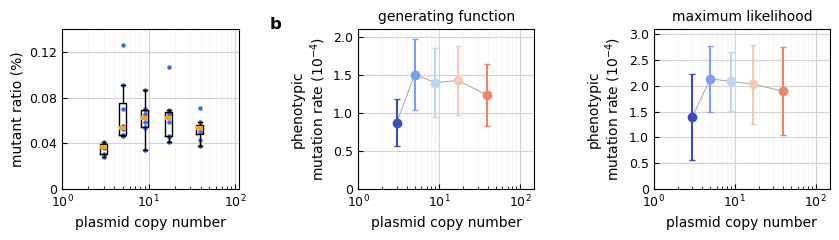

In [82]:
folder_='feedback_lacO/'
mut_file=mut_output+folder_[:-1]+'_mut.txt'
event_file=mut_output+folder_[:-1]+'_events.txt'
colors_=colormaps['coolwarm']
print(mut_file,event_file)

#====================================
labellist=pcn_
fig=plt.figure(figsize=(8.5,2.5))
#---------------------
ax1_= plt.subplot(131)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
#plt.ylim(0, 0.065)
plt.yticks([0,0.04,0.08,0.12],['0','0.04','0.08','0.12'])
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])

#----------------
ax_= plt.subplot(132)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'GF')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,110])
plt.title('generating function', fontsize=10)
plt.annotate('b',xy=(-0.5, 1), xycoords='axes fraction',fontsize=12, fontweight='bold')

#----------------------
ax_= plt.subplot(133)

plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
mutprob, sdmutprob=fc.read_mut_file(mut_file,event_file,'ML')
fc.fig_mutprob(mutprob,sdmutprob,labellist,colors_,ax_)
plt.xlim([1,150])
plt.title('maximum likelihood', fontsize=10)
plt.ylim(0,3.1e-4); plt.yticks([0,0.5e-4,1e-4,1.5e-4,2e-4,2.5e-4,3e-4],['0','0.5','1.0','1.5','2.0','2.5','3.0'])
#=============================
plt.tight_layout()